In [1]:
%matplotlib inline

from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier

import shap

In [2]:
import xgboost as xgb

In [3]:
print(xgb.__version__)
print(shap.__version__)

0.82
0.28.5


In [4]:
file_1 = '../DATA/!CLEAN/2019-01-30_ZIBRA2_YFV-RIO-Diferentes_CTs'

file_2 = '../DATA/!CLEAN/NHP_65_outbreak'

file_3 = '../DATA/!CLEAN/2018-01_Salvador'

file_4 = '../DATA/!CLEAN/2018-03-04_LACEN_Bahia'

file_5 = '../DATA/!CLEAN/FUNED_AGOSTO-2018'

file_6 = '../DATA/!CLEAN/RIO_DE_JANEIRO'

file_7 = '../DATA/!CLEAN/YFV_LACEN_BAHIA'

In [5]:
file_list = [file_1,
            file_2,
            file_3,
            file_4,
            file_5,
            file_6,
            file_7]
seq_list = []
metadata_list = []

In [6]:
for file in file_list:
    seq_file = file + '.aln'
    metadata_file = file + '.xlsx'
    
    seq_list.append(seq_file)
    metadata_list.append(metadata_file)

In [7]:
def read_metadata(excel_file):
    metadata_df = pd.read_excel(excel_file, index_col='index', dtype = {'Ct': np.float64})
    metadata_df = metadata_df[['Host', 'Date', 'Ct']]
    return metadata_df

In [8]:
metadata_df = read_metadata(metadata_list[2])

In [10]:
print(metadata_df)

             Host                 Date      Ct
index                                         
SA1    Callithrix           29.11.2017  32.000
SA2      Allouata           28.11.2017  13.000
SA3      Allouata           28.11.2017  11.000
SA4      Allouata           15.12.2017   9.190
SA5      Allouata           15.12.2017  16.640
SA6      Allouata           22.12.2017   7.535
SA7      Allouata           22.12.2017  16.500
SA46      Cebidae  2017-12-26 00:00:00  10.770
SA48   Callithrix  2017-12-18 00:00:00  13.850
SA54     Allouata  2018-01-05 00:00:00  14.060
SA56      Cebidae  2017-12-30 00:00:00  11.230
SA58   Callithrix  2018-01-04 00:00:00  14.150
SA60     Allouata  2018-01-06 00:00:00  14.150
SA62      Cebidae  2018-01-01 00:00:00  16.320
SA63      Cebidae  2018-01-05 00:00:00  11.570
SA64   Callithrix  2018-01-02 00:00:00  12.750
SA66   Callithrix  2018-01-08 00:00:00  15.010
SA67     Allouata  2018-01-02 00:00:00  11.410
SA68   Callithrix  2018-01-04 00:00:00  13.580
SA129    Allo

In [11]:
pd.to_datetime(metadata_df['Date'])

index
SA1     2017-11-29
SA2     2017-11-28
SA3     2017-11-28
SA4     2017-12-15
SA5     2017-12-15
SA6     2017-12-22
SA7     2017-12-22
SA46    2017-12-26
SA48    2017-12-18
SA54    2018-01-05
SA56    2017-12-30
SA58    2018-01-04
SA60    2018-01-06
SA62    2018-01-01
SA63    2018-01-05
SA64    2018-01-02
SA66    2018-01-08
SA67    2018-01-02
SA68    2018-01-04
SA129   2018-01-02
SA131   2018-01-10
Name: Date, dtype: datetime64[ns]

In [12]:
metadata_df['Date'] = pd.to_datetime(metadata_df['Date'])

In [13]:
metadata_df

,Host,Date,Ct
index,,,
SA1,Callithrix,2017-11-29,32.000
SA2,Allouata,2017-11-28,13.000
SA3,Allouata,2017-11-28,11.000
SA4,Allouata,2017-12-15,9.190
SA5,Allouata,2017-12-15,16.640
SA6,Allouata,2017-12-22,7.535
SA7,Allouata,2017-12-22,16.500
SA46,Cebidae,2017-12-26,10.770
SA48,Callithrix,2017-12-18,13.850


In [14]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [15]:
def func_plot(k=1):
    x = np.linspace(-2, 2, 200)
    plt.plot(x, np.sin(2*np.pi*k*x))

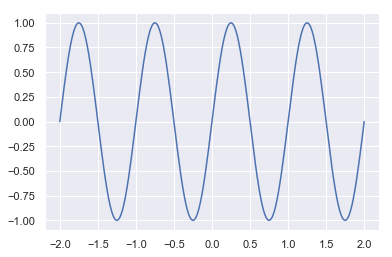

<function __main__.func_plot(k=1)>

In [ ]:
interact(func_plot, k=(1, 10))

# title